In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#for visualization
import matplotlib.pyplot as plt
import imageio
import matplotlib.image as img
from tensorflow.keras.preprocessing import image
import numpy as np
#read image path
import pathlib
from pathlib import Path
#for image processing
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from tensorflow.keras.models import load_model
from PIL import Image
#for model
import tensorflow as tf
from tensorflow.keras import Sequential
from keras.layers import *
#for warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data_path=pathlib.Path('/content/drive/MyDrive/train_cancer')

In [ ]:
data_path

PosixPath('/content/drive/MyDrive/train_cancer')

In [ ]:
image_classes=os.listdir(data_path)
image_classes

['malignant', 'benign']

In [ ]:
def plot_images (image_classes):

    plt.figure(figsize=(12,12))
    # looping through each path
    for i, category in enumerate (image_classes):
      # Getting image path
        image_path= data_path / category
        image_in_folder=os.listdir(image_path)
       #Loading the First Image
        first_image=image_in_folder[0]
        first_image_path=image_path / first_image
        #Reading and Normalizing the Image
        img=image.load_img(first_image_path)
        img_array=image.img_to_array(img) / 255
        #Plotting the Image in a Grid
        plt.subplot(4,4, i+1)
        plt.imshow(img_array)
        plt.title(category)
        plt.axis('off')

plt.show()

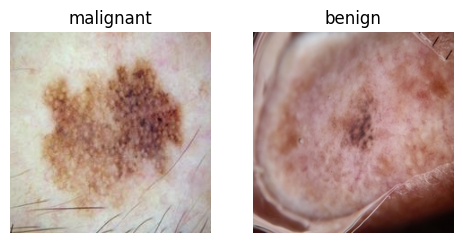

In [ ]:
plot_images (image_classes)

In [ ]:
#create separate generators for training and validation
data_generator=ImageDataGenerator(rescale=1/255,
                                 validation_split=0.2)

In [ ]:
#Loads images from specified directories.
#Resizes them.
#Labels them automatically
#Preprocesses them
train_file=data_generator.flow_from_directory(data_path,
                                            target_size=(224,224),
                                             batch_size=32,
                                              class_mode='categorical',
                                               shuffle=True,
                                                subset='training')

Found 216 images belonging to 2 classes.


In [ ]:

#Loads and preprocesses images
#Resizes, labels, and normalizes images
#each image is processed separately, one at a time
test_file=data_generator.flow_from_directory(data_path,
                                            target_size=(224,224),
                                             batch_size=1,
                                              class_mode='categorical',
                                               shuffle=True,
                                                subset='validation')

Found 54 images belonging to 2 classes.


In [ ]:
#prints the shape of images
print(test_file.image_shape)
print(train_file.image_shape)

(224, 224, 3)
(224, 224, 3)


In [ ]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=3,padding='same',
                 activation='relu',input_shape=[224, 224, 3]))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,padding='same',kernel_size=3,activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(2, activation = 'softmax'))
# summary:
# Takes an image as input.
#Uses filters to find important features in the image
#Reduces the image size to speed up processing.
#Flattens the data for the final decision-making layer.
#Finally outputs the probability of the image being malignant or benign.

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 200704)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      25,690,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,709,890 (98.08 MB)

 Trainable params: 25,709,890 (98.08 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
#Preparing model for training.
#Choosing the Adam optimizer to help model learn efficiently
#Setting a loss function (categorical cross-entropy) to see how far off your model's predictions are from the correct answers.
#Tracking accuracy to know how often your model gets the predictions right.

In [ ]:
model_history=model.fit(train_file,epochs=10,validation_data=test_file)

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.6038 - loss: 2.6252 - val_accuracy: 0.8889 - val_loss: 0.2777
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.8753 - loss: 0.3785 - val_accuracy: 0.8889 - val_loss: 0.3959
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - accuracy: 0.8598 - loss: 0.4743 - val_accuracy: 0.8889 - val_loss: 0.2864
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.8845 - loss: 0.3011 - val_accuracy: 0.8889 - val_loss: 0.2255
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - accuracy: 0.8998 - loss: 0.2101 - val_accuracy: 0.9259 - val_loss: 0.2191
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - accuracy: 0.9524 - loss: 0.1595 - val_accuracy: 0.9444 - val_loss: 0.1718
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.9389 - loss: 0.1300 - val_accuracy: 0.9259 - val_loss: 0.3562
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.9380 - loss: 0.1854 - val_accuracy: 0.9259 - val_loss: 0.24

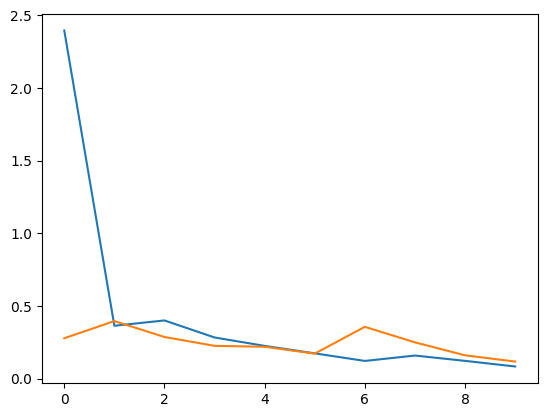

In [ ]:
plt.plot(model_history.history['loss'],label='train_loss')
plt.plot(model_history.history['val_loss'],label='validation_loss')

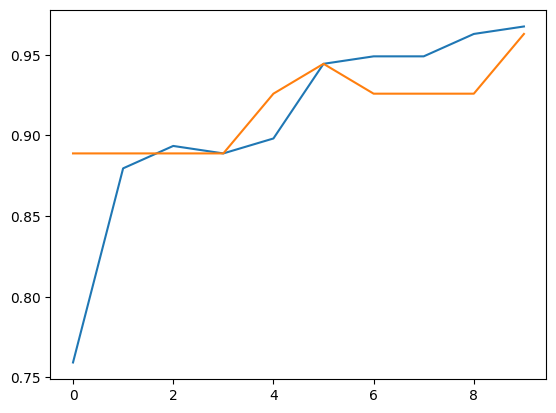

In [ ]:
plt.plot(model_history.history['accuracy'],label='train_accuracy')
plt.plot(model_history.history['val_accuracy'],label='validation_accuracy')

In [ ]:
model.evaluate(test_file)

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9736 - loss: 0.0838


[0.1173897460103035, 0.9629629850387573]

In [ ]:
model.evaluate(train_file)

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 326ms/step - accuracy: 0.9860 - loss: 0.0466


[0.06075570359826088, 0.9814814925193787]

In [ ]:
model.save('skin cancer prediction | ACCURACY 97%|CNN.h5')

In [ ]:
def load_and_preprocess_image(img_path):
    img = Image.open(img_path)
    img = img.resize((224, 224))  # Resize image to 224x224
    img = np.array(img) / 255.0  # Normalize pixel values to [0, 1]
    img = np.expand_dims(img, axis=0)  # Add batch dimension (1, 224, 224, 3)
    return img

# Make a prediction
model = load_model('skin cancer prediction | ACCURACY 97%|CNN.h5')
img = load_and_preprocess_image('/content/drive/MyDrive/train_cancer/malignant/97.jpg')
predictions = model.predict(img)
predicted_class = np.argmax(predictions)


class_labels = ['malignant','benign']

# Print the predicted class
print(f"Predicted class: {class_labels[predicted_class]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
Predicted class: benign


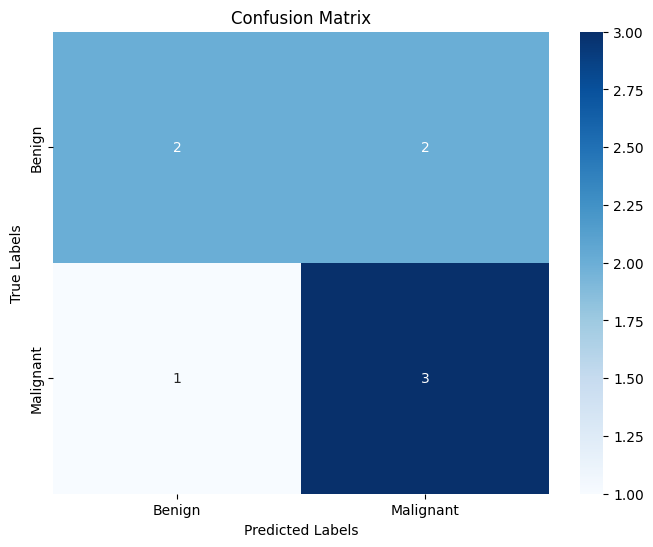

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming `y_true` are the true labels and `y_pred` are the predicted labels from your model
# Replace with your actual true labels and predicted labels
y_true = np.array([0, 1, 0, 1, 1, 0, 0, 1])  # Example true labels (0 for Benign, 1 for Malignant)
y_pred = np.array([0, 1, 1, 1, 0, 0, 1, 1])  # Example predicted labels

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()